In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [6]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [7]:
from sklearn.model_selection import train_test_split

exploit_data = df[df['attack_category'] == 'exploit'].copy()
X = df[df['attack_category'] != 'exploit'].drop(['is_attack','attack','attack_category'],axis=1)
y = df[df['attack_category'] != 'exploit']['is_attack']


exp_test = np.random.choice(exploit_data.index,18,replace=False)
exp_train = exploit_data[~exploit_data.index.isin(exp_test)].index

exp_train_df = df[df.index.isin(exp_train)].drop(['is_attack','attack','attack_category'],axis=1)
exp_test_df = df[df.index.isin(exp_test)].drop(['is_attack','attack','attack_category'],axis=1)

trainx,testx,trainy,testy = train_test_split(X,y, test_size=0.2, random_state=42)

X_train = pd.concat([trainx,exp_train_df])
X_test = pd.concat([testx,exp_test_df])

y_test_ones = pd.DataFrame([1 for i in range(len(exp_test))],columns=['is_attack'],index=exp_test)
y_train_ones = pd.DataFrame([1 for i in range(len(exp_train))],columns=['is_attack'],index=exp_train)

y_train = pd.concat([trainy,y_train_ones])
y_test = pd.concat([testy,y_test_ones])

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [9]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [10]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


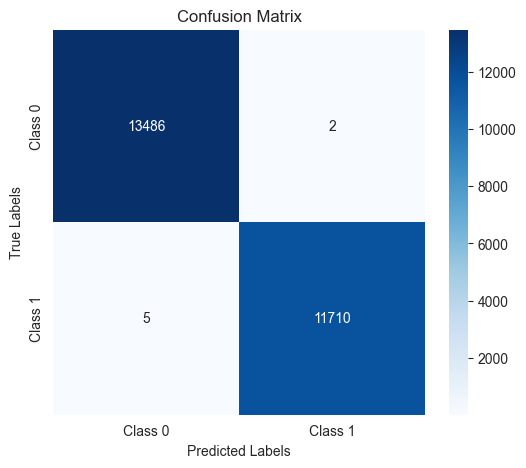

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['normal','attack']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13488
      attack       1.00      1.00      1.00     11715

    accuracy                           1.00     25203
   macro avg       1.00      1.00      1.00     25203
weighted avg       1.00      1.00      1.00     25203



In [13]:
y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [14]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]

In [15]:
combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]

,is_attack,is_attack_pred,predict_prob
62967,0,1,0.72
57549,0,1,0.81
35434,1,0,0.27
81558,1,0,0.29
1143,1,0,0.45
56279,1,0,0.48
25636,1,0,0.38


In [16]:
fp_threshold = combined_pred[np.logical_and(combined_pred['is_attack'] != combined_pred['is_attack_pred'],combined_pred['is_attack_pred'] == 1)].sort_values('predict_prob',ascending=False).head(1)
fp_threshold = float(fp_threshold.loc[:, 'predict_prob'].iloc[0])
fp_threshold

0.81

In [17]:
combined_pred.shape

(25203, 3)

In [18]:
combined_pred = combined_pred[np.logical_or(combined_pred['is_attack'] == combined_pred['is_attack_pred'],combined_pred['predict_prob'] > fp_threshold)]

In [19]:
combined_pred.shape

(25196, 3)

In [20]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df['attack_category'],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category
117039,-0.109638,-0.125051,1.209265,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.291830,-0.340287,1.598488,1.600857,-0.373006,-0.373061,-1.477541,-0.017118,-0.37445,0.733837,-1.017018,-1.138046,-0.173928,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.651758,2.106111,-0.251237,-0.240967,-0.009583,-0.309348,0.077136,1.650749,-0.341729,-0.173552,-0.121959,-0.910526,-0.262675,1,1,1.0,dos
71266,-0.109638,-0.125051,2.311198,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.300566,-0.146354,1.598488,1.600857,-0.373006,-0.373061,-1.341172,-0.017118,-0.37445,0.733837,-0.890570,-1.004430,-0.068216,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,-0.220501,2.117528,-0.251237,-0.240967,2.300728,-0.107837,0.078314,1.650749,-0.341729,-0.173552,1.272455,-0.900445,-0.047451,1,1,1.0,dos
26347,-0.109638,-0.125051,-0.443634,0.751759,-0.008274,-0.005276,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,1.236265,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,-0.691351,-0.312583,-0.638968,-0.633621,-0.373006,-0.373061,0.772557,-0.349432,-0.37445,0.733837,1.259043,1.066622,-0.438206,-0.479831,-0.289844,-0.641381,-0.626660,-0.386408,-0.375247,0.651758,-0.542657,-0.251237,-0.240967,-0.504650,-0.270746,-0.196156,-0.627385,-0.341729,-0.173552,-0.420762,1.305341,-0.293717,0,0,0.0,normal
53783,-0.109638,-0.125051,1.086828,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.213201,-0.187911,1.598488,1.600857,-0.373006,-0.373061,-1.363900,-0.017118,-0.37445,0.733837,-0.881538,-1.004430,-0.068216,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.651758,2.003357,-0.251237,-0.240967,1.805662,-0.150041,0.066534,1.650749,-0.341729,-0.173552,1.372056,-0.899836,-0.032965,1,1,1.0,dos
19960,-0.109638,-0.125051,-0.443634,0.751759,-0.008293,-0.001993,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,1.236265,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,-0.726297,-0.367992,-0.638968,-0.633621,-0.373006,-0.373061,0.772557,-0.349432,-0.37445,0.733837,1.259043,1.066622,-0.438206,-0.479831,-0.289844,-0.641381,-0.626660,-0.386408,-0.375247,0.651758,-0.542657,-0.251237,-0.240967,-0.504650,-0.328361,-0.196156,-0.627385,-0.341729,-0.173552,-0.420762,1.305341,-0.293717,0,0,0.0,normal


In [21]:
attacks = op[op['is_attack_pred'] == 1].copy()
attacks['attack_category'].value_counts()

attack_category
dos         8950
scan        2367
backdoor     208
access       168
exploit       17
Name: count, dtype: int64

In [22]:
exploit_data2 = attacks[attacks['attack_category'] == 'exploit'].copy()

X1 = attacks[attacks['attack_category'] != 'exploit'].drop(['is_attack','is_attack_pred','attack_category','predict_prob'],axis=1)
y1 = attacks[attacks['attack_category'] != 'exploit']['attack_category']


exp_test2 = np.random.choice(exploit_data2.index,9,replace=False)
exp_train2 = exploit_data2[~exploit_data2.index.isin(exp_test2)].index

exp_train2_df = attacks[attacks.index.isin(exp_train2)].drop(['is_attack','is_attack_pred','attack_category','predict_prob'],axis=1)
exp_test2_df = attacks[attacks.index.isin(exp_test2)].drop(['is_attack','is_attack_pred','attack_category','predict_prob'],axis=1)

trainx,testx,trainy,testy = train_test_split(X1,y1, test_size=0.2, random_state=42)

X1_train = pd.concat([trainx,exp_train2_df])
X1_test = pd.concat([testx,exp_test2_df])

y1_test_ones = pd.Series(['exploit' for i in range(len(exp_test2))],index=exp_test2)
y1_train_ones = pd.Series(['exploit' for i in range(len(exp_train2))],index=exp_train2)

y1_train = pd.concat([trainy,y1_train_ones])
y1_test = pd.concat([testy,y1_test_ones])

In [23]:
label_encoder = LabelEncoder()
label_encoder.fit(y1_train)


# Add the 'unknown' category for unseen labels
unknown_class = 'normal'

# Get the current classes from the encoder and add 'unknown' class
classes_ = np.append(label_encoder.classes_, unknown_class)

# Function to handle unseen labels
def safe_transform(y, label_encoder, classes_):
    encoded_labels = []
    for label in y:
        if label in label_encoder.classes_:
            encoded_labels.append(label_encoder.transform([label])[0])
        else:
            # If label is unseen, map it to the 'unknown' category
            encoded_labels.append(len(classes_) - 1)  # This is the index of 'unknown'
    return np.array(encoded_labels)

# Transform the training and test data
y1_train_encoded = safe_transform(y1_train, label_encoder, classes_)
y1_test_encoded = safe_transform(y1_test, label_encoder, classes_)

In [24]:
from sklearn.ensemble  import RandomForestClassifier
rf1 = RandomForestClassifier(class_weight='balanced',random_state=42)
rf1.fit(X1_train, y1_train_encoded)
y_pred1= rf1.predict(X1_test)

In [25]:
name_labels = [label_encoder.classes_[i] for i in range(0,5)]

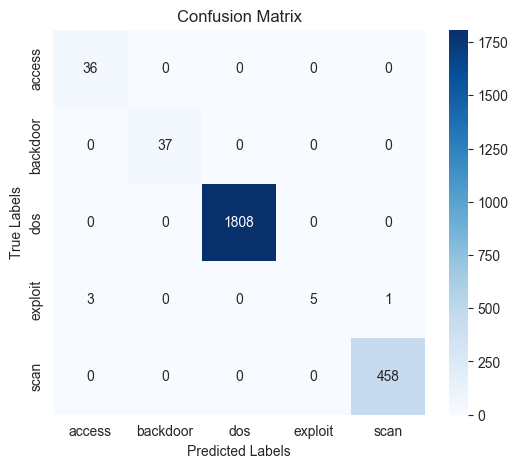

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=name_labels, yticklabels=name_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y1_test_encoded, y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00      1808
           3       1.00      0.56      0.71         9
           4       1.00      1.00      1.00       458

    accuracy                           1.00      2348
   macro avg       0.98      0.91      0.93      2348
weighted avg       1.00      1.00      1.00      2348



In [28]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50,100, 150,200],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 7,10]
}

grid_search = GridSearchCV(rf1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X1_train, y1_train_encoded)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [29]:
all_params = grid_search.best_estimator_.get_params()
tuned_params = {param: all_params[param] for param in param_grid}
tuned_params

{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10}

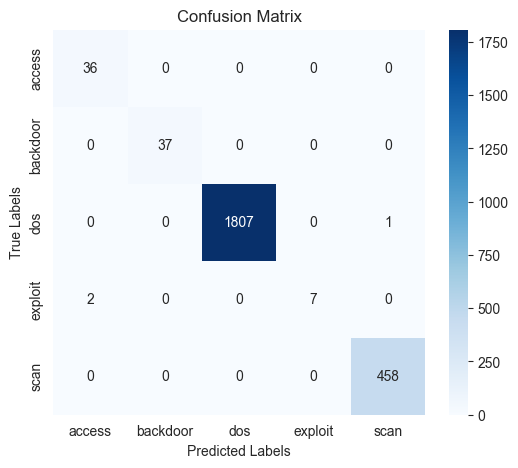

In [30]:
best_clf = grid_search.best_estimator_
y_pred22= best_clf.predict(X1_test)

cm2 = confusion_matrix(y1_test_encoded, y_pred22)

plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=name_labels, yticklabels=name_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(y1_test_encoded, y_pred22))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00      1808
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00       458

    accuracy                           1.00      2348
   macro avg       0.99      0.96      0.97      2348
weighted avg       1.00      1.00      1.00      2348



In [32]:
y1_pred_df = pd.DataFrame(y_pred22,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [33]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = best_clf.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [34]:
ocategory = dict()
for i in range(len(label_encoder.classes_)):
    ocategory[i] = label_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [35]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [46]:
combined_pred1[combined_pred1['attack_category_pred'] != combined_pred1['attack_category']]

,attack_category,attack_category_pred,predict_prob
116232,dos,scan,0.00000
30533,exploit,access,0.00555
102579,exploit,access,0.00000


In [37]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack_category_pred,predict_prob,attack
94665,-0.109638,-0.125051,-0.810945,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.484032,-0.284878,1.598488,1.600857,-0.373006,-0.373061,-1.432085,-0.072504,-0.37445,0.733837,-0.980890,-1.093508,-0.173928,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.215628,2.357287,-0.251237,-0.240967,0.650506,-0.233007,0.053183,1.650749,-0.341729,-0.173552,0.276445,-0.908962,-0.221286,dos,dos,0.0,neptune
43315,-0.109638,-0.125051,1.086828,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.038472,-0.312583,1.598488,1.600857,-0.373006,-0.373061,-1.454813,-0.017118,-0.37445,0.733837,-0.881538,-1.004430,-0.121072,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.651758,1.775015,-0.251237,-0.240967,0.320461,-0.284285,0.042974,1.650749,-0.341729,-0.173552,1.372056,-0.899836,-0.070215,dos,dos,0.0,neptune
23180,-0.109638,-0.125051,2.249980,-2.226038,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,0.549229,-0.340287,-0.638968,-0.633621,2.755486,2.724103,-1.454813,0.038268,-0.37445,0.733837,-1.017018,-1.138046,-0.068216,-0.479831,-0.289844,-0.641381,-0.626660,2.881612,2.763051,-0.656631,-0.542657,2.057801,0.817762,-0.504650,-0.300418,0.005868,-0.627385,3.332749,-0.069200,-0.420762,-0.910526,-0.250258,dos,dos,0.0,neptune
123650,-0.109638,2.222450,1.086828,0.751759,-0.008317,-0.005335,-0.014089,11.552174,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,0.619121,0.380038,0.815378,-0.633621,-0.373006,-0.373061,-0.704780,-0.072504,-0.37445,0.733837,-0.547355,-0.670389,3.737396,0.231572,-0.289844,-0.439279,-0.626660,1.901206,-0.375247,-0.656631,0.607616,-0.251237,-0.240967,-0.504650,0.438647,-0.044000,-0.422353,2.230405,-0.173552,-0.420762,-0.805629,8.698078,dos,dos,0.0,teardrop
23480,-0.109638,-0.125051,2.311198,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.020999,-0.354140,1.598488,1.600857,-0.373006,-0.373061,-1.477541,-0.017118,-0.37445,0.733837,-1.026050,-1.138046,-0.068216,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,-0.220501,1.752181,-0.251237,-0.240967,-0.174605,-0.313813,0.040618,1.650749,-0.341729,-0.173552,-0.221560,-0.910613,-0.264744,dos,dos,0.0,neptune


In [38]:
op1['attack_category'].value_counts()

attack_category
dos         1808
scan         458
backdoor      37
access        36
exploit        9
Name: count, dtype: int64

In [39]:
final = op1.drop(['attack_category','predict_prob'],axis=1)
final.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category_pred,attack
94665,-0.109638,-0.125051,-0.810945,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.484032,-0.284878,1.598488,1.600857,-0.373006,-0.373061,-1.432085,-0.072504,-0.37445,0.733837,-0.980890,-1.093508,-0.173928,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.215628,2.357287,-0.251237,-0.240967,0.650506,-0.233007,0.053183,1.650749,-0.341729,-0.173552,0.276445,-0.908962,-0.221286,dos,neptune
43315,-0.109638,-0.125051,1.086828,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.038472,-0.312583,1.598488,1.600857,-0.373006,-0.373061,-1.454813,-0.017118,-0.37445,0.733837,-0.881538,-1.004430,-0.121072,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,0.651758,1.775015,-0.251237,-0.240967,0.320461,-0.284285,0.042974,1.650749,-0.341729,-0.173552,1.372056,-0.899836,-0.070215,dos,neptune
23180,-0.109638,-0.125051,2.249980,-2.226038,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,0.549229,-0.340287,-0.638968,-0.633621,2.755486,2.724103,-1.454813,0.038268,-0.37445,0.733837,-1.017018,-1.138046,-0.068216,-0.479831,-0.289844,-0.641381,-0.626660,2.881612,2.763051,-0.656631,-0.542657,2.057801,0.817762,-0.504650,-0.300418,0.005868,-0.627385,3.332749,-0.069200,-0.420762,-0.910526,-0.250258,dos,neptune
123650,-0.109638,2.222450,1.086828,0.751759,-0.008317,-0.005335,-0.014089,11.552174,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,0.619121,0.380038,0.815378,-0.633621,-0.373006,-0.373061,-0.704780,-0.072504,-0.37445,0.733837,-0.547355,-0.670389,3.737396,0.231572,-0.289844,-0.439279,-0.626660,1.901206,-0.375247,-0.656631,0.607616,-0.251237,-0.240967,-0.504650,0.438647,-0.044000,-0.422353,2.230405,-0.173552,-0.420762,-0.805629,8.698078,dos,teardrop
23480,-0.109638,-0.125051,2.311198,-0.737139,-0.008322,-0.005335,-0.014089,-0.091397,-0.008191,-0.09498,-0.026904,-0.808888,-0.019146,-0.036626,-0.02463,-0.019465,-0.026149,-0.017653,-0.042446,0.0,-0.00315,-0.097711,1.020999,-0.354140,1.598488,1.600857,-0.373006,-0.373061,-1.477541,-0.017118,-0.37445,0.733837,-1.026050,-1.138046,-0.068216,-0.479831,-0.289844,1.604198,1.614204,-0.386408,-0.375247,-0.220501,1.752181,-0.251237,-0.240967,-0.174605,-0.313813,0.040618,1.650749,-0.341729,-0.173552,-0.221560,-0.910613,-0.264744,dos,neptune


In [43]:
dos_data = final[final['attack_category_pred'] == 'dos'].copy()
dos_data.drop('attack_category_pred',axis=1,inplace=True)

scan_data = final[final['attack_category_pred'] == 'scan'].copy()
scan_data.drop('attack_category_pred',axis=1,inplace=True)

backdoor_data = final[final['attack_category_pred'] == 'backdoor'].copy()
backdoor_data.drop('attack_category_pred',axis=1,inplace=True)

access_data = final[final['attack_category_pred'] == 'access'].copy()
access_data.drop('attack_category_pred',axis=1,inplace=True)

exploit_data = final[final['attack_category_pred'] == 'exploit'].copy()
exploit_data.drop('attack_category_pred',axis=1,inplace=True)

In [44]:
dosx = dos_data.drop('attack',axis=1)
dosy = dos_data['attack']
dosxtrain,dosxtest,dosytrain,dosytest = train_test_split(dosx,dosy,test_size=0.2,random_state=42)


scanx = scan_data.drop('attack',axis=1)
scany = scan_data['attack']
scanxtrain,scanxtest,scanytrain,scanytest = train_test_split(scanx,scany,test_size=0.2,random_state=42)

backx = backdoor_data.drop('attack',axis=1)
backy = backdoor_data['attack']
backxtrain,backxtest,backytrain,backytest = train_test_split(backx,backy,test_size=0.2,random_state=42)

accessx = access_data.drop('attack',axis=1)
accessy = access_data['attack']
accessxtrain,accessxtest,accessytrain,accessytest = train_test_split(accessx,accessy,test_size=0.2,random_state=42)

exploitx = exploit_data.drop('attack',axis=1)
exploity = exploit_data['attack']
exploitxtrain,exploitxtest,exploitytrain,exploitytest = train_test_split(exploitx,exploity,test_size=0.2,random_state=42)

In [45]:
dos_encoder = LabelEncoder()
dosytrain = dos_encoder.fit_transform(dosytrain)
dosytest = dos_encoder.transform(dosytest)

scan_encoder = LabelEncoder()
scanytrain = scan_encoder.fit_transform(scanytrain)
scanytest = scan_encoder.transform(scanytest)

access_encoder = LabelEncoder()
accessytrain = access_encoder.fit_transform(accessytrain)
accessytest = access_encoder.transform(accessytest)

backdoor_encoder = LabelEncoder()
backytrain = backdoor_encoder.fit_transform(backytrain)
backytest = backdoor_encoder.transform(backytest)

exploit_encoder = LabelEncoder()
exploitytrain= exploit_encoder.fit_transform(exploitytrain)
exploitytest = exploit_encoder.transform(exploitytest)

ValueError: y contains previously unseen labels: 'teardrop'

In [81]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=5)

# dosxtrain, dosytrain = smote.fit_resample(dosxtrain, dosytrain)
# scantrain, scanytrain = smote.fit_resample(scantrain, scanytrain)
# backxtrain, backytrain = smote.fit_resample(backxtrain, backytrain)
# accessxtrain, accessytrain = smote.fit_resample(accessxtrain, accessytrain)
# exploitxtrain, exploitytrain = smote.fit_resample(exploitytrain, dosytrain)

In [82]:
rfdos = RandomForestClassifier(class_weight='balanced',random_state=42)
rfdos.fit(dosxtrain, dosytrain)
y_pred_dos= rfdos.predict(dosxtest)

rfscan = RandomForestClassifier(class_weight='balanced',random_state=42)
rfscan.fit(scanxtrain, scanytrain)
y_pred_scan= rfscan.predict(scanxtest)

rfback = RandomForestClassifier(class_weight='balanced',random_state=42)
rfback.fit(backxtrain, backytrain)
y_pred_back = rfback.predict(backxtest)

rfaccess = RandomForestClassifier(class_weight='balanced',random_state=42)
rfaccess.fit(accessxtrain, accessytrain)
y_pred_access= rfaccess.predict(accessxtest)

rfexploit = RandomForestClassifier(class_weight='balanced',random_state=42)
rfexploit.fit(exploitxtrain, exploitytrain)
y_pred_exploit = rfexploit.predict(exploitxtest)

In [ ]:
cmdos = confusion_matrix(dosytest, y_pred_dos)
dos_labels = [dos_encoder.classes_[i] for i in range(len(np.unique(dosytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmdos, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cmscan = confusion_matrix(scanytest, y_pred_scan)

plt.figure(figsize=(6, 5))
sns.heatmap(cmscan, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cmsback = confusion_matrix(backytest, y_pred_back)

plt.figure(figsize=(6, 5))
sns.heatmap(cmsback, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cmaccess = confusion_matrix(accessytest, y_pred_access)

plt.figure(figsize=(6, 5))
sns.heatmap(cmaccess, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cmexploit = confusion_matrix(exploitytest, y_pred_exploit)

plt.figure(figsize=(6, 5))
sns.heatmap(cmexploit, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()